In [1]:
import torch
from torch.utils.data import Dataset, DataLoader

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

import seaborn as sns
import numpy as np

from models import *

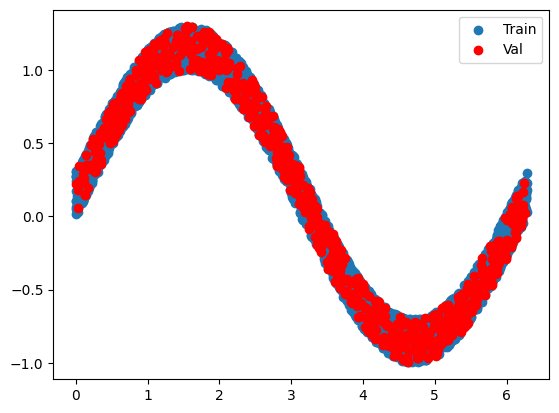

In [2]:
X = torch.rand(5000)*2*torch.pi
Y = torch.sin(X) + torch.rand(5000)*0.3

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.15)

plt.scatter(X_train, y_train, label='Train')
plt.scatter(X_test, y_test, label='Val', c='red')
plt.legend()

In [3]:
class CustomDataset(Dataset):
    def __init__(self, X, y):
        self.X = X
        self.y = y

    def __len__(self):
        return len(self.y)

    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

In [4]:
X_train, X_test, y_train, y_test = X_train.view(-1, 1), X_test.view(-1, 1), y_train.view(-1, 1), y_test.view(-1, 1)

train_dataset = CustomDataset(X_train, y_train)
val_dataset = CustomDataset(X_test, y_test)

train_dataloader = DataLoader(train_dataset, batch_size=32, shuffle=True, drop_last=True)
val_dataloader = DataLoader(val_dataset, batch_size=32, shuffle=True, drop_last=True)

# Base

In [133]:
base_model = MLP() 
optimizer = torch.optim.Adam(base_model.parameters(), lr=0.001)
criterion = torch.nn.MSELoss()
trainer(base_model, train_dataloader, val_dataloader, optimizer, criterion, epochs=100, verbose=10)

Epoch: 0 :::: Train loss 0.3589703142642975 :::: Val loss 0.17897672951221466 

Epoch: 10 :::: Train loss 0.049700237810611725 :::: Val loss 0.04747563600540161 

Epoch: 20 :::: Train loss 0.01719168946146965 :::: Val loss 0.017013033851981163 

Epoch: 30 :::: Train loss 0.010298690758645535 :::: Val loss 0.010996002703905106 

Epoch: 40 :::: Train loss 0.00864744558930397 :::: Val loss 0.009074951522052288 

Epoch: 50 :::: Train loss 0.008240854367613792 :::: Val loss 0.008507315069437027 

Epoch: 60 :::: Train loss 0.008166298270225525 :::: Val loss 0.00804161187261343 

Epoch: 70 :::: Train loss 0.007994921877980232 :::: Val loss 0.007927985861897469 

Epoch: 80 :::: Train loss 0.007821455597877502 :::: Val loss 0.00816067960113287 

Epoch: 90 :::: Train loss 0.008041059598326683 :::: Val loss 0.009075164794921875 



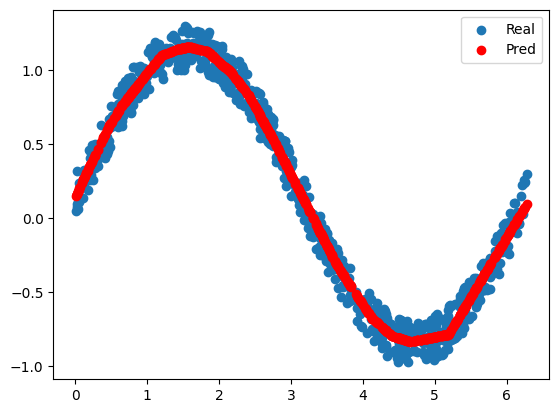

In [135]:
y_pred = base_model(X_test.to('cuda'))
y_pred = torch.flatten(y_pred).cpu().detach().numpy()
y_real = torch.flatten(y_test)
plt.scatter(torch.flatten(X_test), y_real, label='Real')
plt.scatter(torch.flatten(X_test), y_pred, label='Pred', c='red')
plt.legend()

# Masksemble

In [146]:
mask_model = MLP_Maksembles(2,6) 
optimizer = torch.optim.Adam(mask_model.parameters(), lr=0.001)
criterion = torch.nn.MSELoss()
trainer(mask_model, train_dataloader, val_dataloader, optimizer, criterion, epochs=100, verbose=10)

Epoch: 0 :::: Train loss 0.2685836851596832 :::: Val loss 0.16996696591377258 

Epoch: 10 :::: Train loss 0.05255303159356117 :::: Val loss 0.04959336668252945 

Epoch: 20 :::: Train loss 0.024323804304003716 :::: Val loss 0.02539641782641411 

Epoch: 30 :::: Train loss 0.014532705768942833 :::: Val loss 0.014644830487668514 

Epoch: 40 :::: Train loss 0.010604380629956722 :::: Val loss 0.010945911519229412 

Epoch: 50 :::: Train loss 0.009454118087887764 :::: Val loss 0.009349459782242775 

Epoch: 60 :::: Train loss 0.008743065409362316 :::: Val loss 0.008812722750008106 

Epoch: 70 :::: Train loss 0.008330832235515118 :::: Val loss 0.008394881151616573 

Epoch: 80 :::: Train loss 0.008288129232823849 :::: Val loss 0.008421595208346844 

Epoch: 90 :::: Train loss 0.00831562653183937 :::: Val loss 0.008244570344686508 



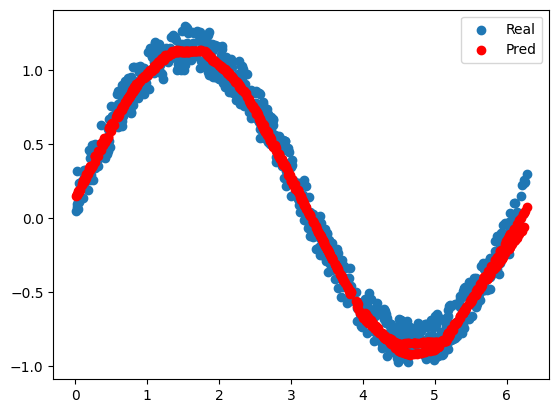

In [147]:
y_pred = mask_model(X_test.to('cuda'))
y_pred = torch.flatten(y_pred).cpu().detach().numpy()
y_real = torch.flatten(y_test)
plt.scatter(torch.flatten(X_test), y_real, label='Real')
plt.scatter(torch.flatten(X_test), y_pred, label='Pred', c='red')
plt.legend()

# Dropout

In [5]:
drop_model = MLP_Dropout() 
optimizer = torch.optim.Adam(drop_model.parameters(), lr=0.001)
criterion = torch.nn.MSELoss()
trainer(drop_model, train_dataloader, val_dataloader, optimizer, criterion, epochs=100, verbose=15)

Epoch: 0 :::: Train loss 0.32646915316581726 :::: Val loss 0.15495704114437103 

Epoch: 15 :::: Train loss 0.05393047258257866 :::: Val loss 0.02719850093126297 

Epoch: 30 :::: Train loss 0.03927536681294441 :::: Val loss 0.01804477721452713 

Epoch: 45 :::: Train loss 0.03302379325032234 :::: Val loss 0.011337040923535824 

Epoch: 60 :::: Train loss 0.03500782698392868 :::: Val loss 0.011698133312165737 

Epoch: 75 :::: Train loss 0.03274764120578766 :::: Val loss 0.0109949866309762 

Epoch: 90 :::: Train loss 0.035723570734262466 :::: Val loss 0.012127193622291088 



In [7]:
#Activando dropout en inferencia
drop_model.eval()
for m in drop_model.modules():
  if m.__class__.__name__.startswith('Dropout'):
    m.train()

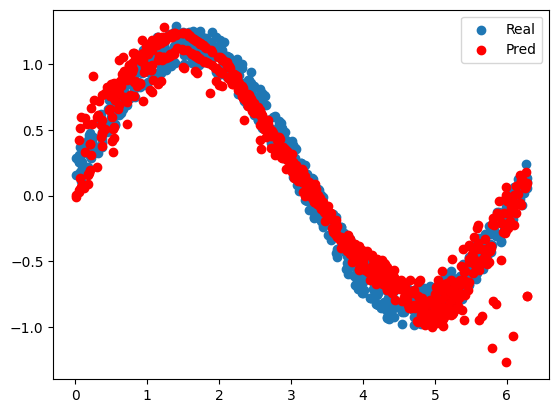

In [62]:
y_pred = drop_model(X_test.to('cuda'))
y_pred = torch.flatten(y_pred).cpu().detach().numpy()
y_real = torch.flatten(y_test)
plt.scatter(torch.flatten(X_test), y_real, label='Real')
plt.scatter(torch.flatten(X_test), y_pred, label='Pred', c='red')
plt.legend()

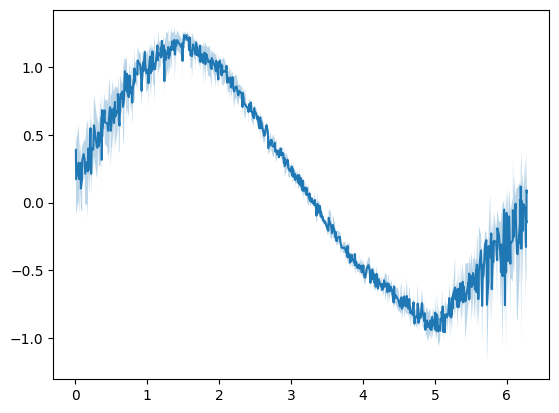

In [183]:
y_drop_1 = drop_model(X_test.to('cuda'))
y_drop_2 = drop_model(X_test.to('cuda'))
y_drop_3 = drop_model(X_test.to('cuda'))
y_drop_4 = drop_model(X_test.to('cuda'))
y_drop = torch.cat((y_drop_1, y_drop_2, y_drop_3, y_drop_4),dim=1)
y_mean = torch.mean(y_drop,dim=1).cpu().detach().numpy()
y_std = torch.std(y_drop,dim=1).cpu().detach().numpy()

x_flat = torch.flatten(X_test).detach().numpy()
y_mean = np.array([x for _,x in sorted(zip(x_flat,y_mean))],dtype=np.float64)
y_std = np.array([x for _,x in sorted(zip(x_flat,y_std))], dtype=np.float64)
x_flat = sorted(x_flat)

plt.plot(x_flat, y_mean)
plt.fill_between(x_flat, y_mean-y_std, y_mean+y_std ,alpha=0.3, animated=True)

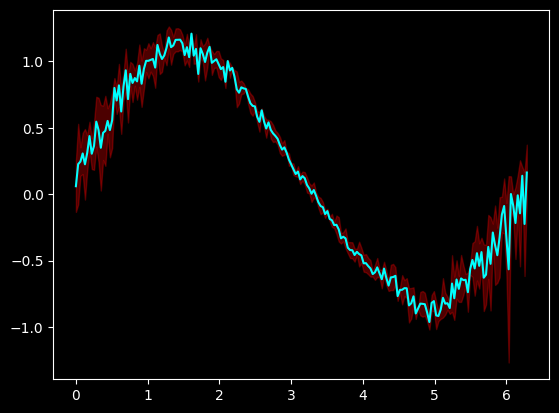

In [233]:
x_plot = torch.linspace(0,np.pi*2,200).view(-1, 1)
y_drop_1 = drop_model(x_plot.to('cuda'))
y_drop_2 = drop_model(x_plot.to('cuda'))
y_drop_3 = drop_model(x_plot.to('cuda'))
y_drop_4 = drop_model(x_plot.to('cuda'))
y_drop = torch.cat((y_drop_1, y_drop_2, y_drop_3, y_drop_4),dim=1)
y_mean = torch.mean(y_drop,dim=1).cpu().detach().numpy()
y_std = torch.std(y_drop,dim=1).cpu().detach().numpy()

#plt.style.use('dark_background')
x_plot = torch.flatten(x_plot)
ax = plt.axes()
#ax.set_facecolor('#9100BD')
plt.plot(x_plot, y_mean, c='cyan')
plt.fill_between(x_plot, y_mean-y_std, y_mean+y_std ,alpha=0.3, animated=True,color='red')
plt.show()